# Module 2 - describing and representing tabulated data 
-------------------------------------------------------------------------------------------------------

## Table of Content <a id='toc'></a>



1. **[Basic description - common summary statistics](#descr1)**
   <br>

2. **[Basic representation - plotting one column](#plt1)**  
   [Interlude: multi-panel figures](#multi)  
   [Exercise 1 - histograms](#ex1)  
   <br>

3. **[Accounting for categories in the data](#descr.3)**  
   3.1 [The `.groupby()` method](#descr.3.1)  
   3.2 [The `hue` argument and `sns.catplot()`](#descr.3.2)  
   [Exercise 2 - representing categories](#ex2)  
   <br>
   
4. **[Representing the relationship between 2 numerical variables](#plot2)**
   <br>

5. **[Writing plots to disk](#writing)**
   <br>
   
6. **[Free form exercise](#exo)**
   <br>

**Supplementary Material:**  
   * [Annex - seaborn themes + python graph gallery](#gallery)


<br>

## Introduction

Before we begin this chapter in earnest, let's import some libraries and read the data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("All modules loaded successfully!")

All modules loaded successfully!


> Note: if you are missing some of the above modules, you should install them.
>
>    * Installation with **pip**: `pip install --user pandas matplotlib seaborn numpy` 
>    * Installation with **conda**: `conda install -c conda-forge pandas matplotlib seaborn numpy`

<br>
<br>

This is a configuration to make the plots work better when presenting online... you do **not need to run this cell**.

In [4]:
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=20)

<br>
<br>
<br>

[Back to ToC](#toc)


## 1. Basic description - common summary statistics <a id='descr1'></a>
-----------------------------------------------------------------------------------------

When doing exploratory analysis of a dataset, it is often useful get some basic statistics on a per-column basis (since rows will typically represent the samples and columns the explanatory variables).

Pandas has a number of methods that can be applied both on an entire DataFrame or on individual columns (Series):
* **`describe()`**: prints summary statistics for all **numeric columns** (count, mean, min, max, std, quantiles).
* **`count()`**: returns the count of values (in each column, if applied to a DataFrame), that are not NaN
  (i.e. missing values - Not a Number).
* **`value_counts()`**: returns the count of each value. Useful for discrete variables (e.g. factors).
* **`min()`**, **`max()`**, **`mean()`**, **`std()`**, **`quantile()`**, **`sum()`**: returns the min,
  max, mean, etc.

When applied to a DataFrame, these method compute values for all columns, skipping columns for which they cannot be applied (e.g. standard deviation can only be computed for numeric columns).

> Note: by default, all these statistics are computed by columns (e.g. max value of all rows in a given column), but they can also be computed by row by adding the `axis=1` argument. E.g. `df.max(axis=1)` returns the max value among columns for each row.

<br>

**Example:** in the Titanic dataset, count the number of people that embarked at different ports.  
The Port of Embarkation information is given in the column `Embarked`: C = Cherbourg; Q = Queenstown; S = Southampton.

In [5]:
# Load the Titanic data set.
df = pd.read_csv("data/titanic.csv") 
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


In [6]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<br>

**Example:** compute the mean, median, min and max passenger fare.

In [7]:
print("mean Fare", df.Fare.mean())
print("median Fare", df.Fare.median())
print("min Fare", df.Fare.min())
print("max Fare", df.Fare.max())

mean Fare 32.205016835016835
median Fare 14.45
min Fare 0.0
max Fare 512.33


* The **`.describe()`** method is a shortcut to compute all of the above statistics.

In [8]:
df.Fare.describe()

count    891.000000
mean      32.205017
std       49.693389
min        0.000000
25%        7.915000
50%       14.450000
75%       31.000000
max      512.330000
Name: Fare, dtype: float64

<br>

Of course we can combine this with selections:

In [9]:
mask_male = df.Sex == "male"
print("median fare of male passengers  :", df.Fare[mask_male].median())
print("median fare of female passengers:", df.Fare[~mask_male].median())
print("count of female passengers under 18:", df.Age[~mask_male & (df.Age <= 18)].count())  # Does not include NaN.

median fare of male passengers  : 10.5
median fare of female passengers: 23.0
count of female passengers under 18: 68


<div class="alert alert-block alert-warning">

**Pro-tips:** 
* Note the use of **`~`** to reverse the mask!
* You can use the opertators **&** (AND) and **|** (OR) to combine several conditions.
* **Important:** when combining several conditions, do not forget the parenthesis!
  * `(df.Sex == "male") & (df.Age <= 18)` is correct.
  * `df.Sex == "male" & df.Age <= 18` will raise an error: the parenthesis are missing.

<div>

<br>

These methods can be used on **whole DataFrames**: by default they apply to each column (`axis=0`).  

**Example:**
* Let's compute the mean values for each columnn of the Titanic data set.  
  Note: one could use `df.mean(axis=1)` to compute a mean per row, but it would here be senseless.

In [10]:
df.mean()  # Raises a TypeError or a FutureWarning, depending on the version of pandas.

/tmp/ipykernel_49138/1637655876.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()  # Raises a TypeError or a FutureWarning, depending on the version of pandas.


Age         29.689076
Pclass       2.308642
Survived     0.383838
Family       0.523008
Fare        32.205017
dtype: float64

Depending on the version of pandas, we get either a **`TypeError`** (newer versions) or a **`FutureWarning`** (older versions), letting us know that in the future automatic dropping of non-numerical columns will raise an error.  
We can correct by explicitly selecting columns that contain numeric values:

In [11]:
df[["Age", "Pclass", "Family", "Fare"]].mean()

Age       29.689076
Pclass     2.308642
Family     0.523008
Fare      32.205017
dtype: float64

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1
    
* Compute the mean fare for each passenger class (`Pclass`).

</div>

<br>

Another useful method is **`pd.crosstab()`** to create contingency tables (multivariate frequency distribution of variables). Such tables allow e.g. to look at the relationship between categorical variables:

In [12]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 2
    
* Using the dataset of single cell data `data/pbmc_data.countMatrix.50.txt.zip`:
  1. Compute the sum for each column.
  2. Normalize each column by dividing its values by the column-wise sum.
  
</div>

<br>
<br>

A very useful method of DataFrame to get an **overview of a dataset** is **`df.describe()`**:

In [13]:
df.describe()

,Age,Pclass,Survived,Family,Fare
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.689076,2.308642,0.383838,0.523008,32.205017
std,14.516759,0.836071,0.486592,1.102743,49.693389
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,0.000000,0.000000,7.915000
50%,28.000000,3.000000,0.000000,0.000000,14.450000
75%,38.000000,3.000000,1.000000,1.000000,31.000000
max,80.000000,3.000000,1.000000,8.000000,512.330000


The `df.describe()` function gives information about all numerical columns in the dataset at once (note that non-numerical values are absent here).

It is very useful not only to get a first impression on the dataset, but also to catch eventual errors in the data: a negative number where there should be only positive values, missing values (NAs), ...


<br>

**BUT** the most eagle-eyed among you will have spotted a problem here... what is it? how to solve it ?



In [14]:
# %load solutions/solution_describe.py

<br>

Anyway, back to the matter at hand.

**`.describe()`** gives access to some of the most commonly used summary statistics:
* (arithmetic) **mean**: ${\displaystyle \bar{x}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$  or,
  for coders: `sum(x) / len(x)`
* **standard deviation** (a.k.a. std, stdev): this corresponds to the average of the absolute difference to the mean. It is the **square root of the variance**.
* **minimum** and **maximum**: smallest and biggest value among the data. Looking at them can help detect outliers.
* **quartiles**: they correspond to the value such that
    * 25% (first quartile, Q1), 
    * 50% (second quartile, Q2, median), or
    * 75% (second quartile, Q3)
    
  of the values are lower than them. They are less sensitive than the mean to outlier values.


<br>
<br>
<br>

[Back to ToC](#toc)

## 2. Basic representation - plotting one column <a id='plt1'></a>
-----------------------------------------------------------


It is all nice to be able to display numerical summary numbers, but often data is best explored visually! To this end, there are a number of plotting libraries in python. Here we will mostly be using **matplotlib** and **seaborn**, which are two very popular plotting libraries in python.

* **[matplotlib](https://matplotlib.org)** can be seen as a base library, which defines a lot of
  low-level plotting functions.
* **[seaborn](https://seaborn.pydata.org)** is built on top of matplotlib, and provides more high-level
  functions. It's designed to interface very well with DataFrames.

We will not delve in all the details of these two libraries, but will instead try to convey elements about their general philosophies and look at their most common functions/arguments. This should give you a head start to get the most out of their very well done tutorial and galleries:
 * [matplotlib](https://matplotlib.org) -
   [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) -
   [gallery](https://matplotlib.org/stable/gallery/index.html)
 * [seaborn](https://seaborn.pydata.org) -
   [tutorial](https://seaborn.pydata.org/tutorial.html) -
   [gallery](https://seaborn.pydata.org/examples/index.html)

<br>

> Note: `pandas` also proposes plotting functions, which are basically also using `matplotlib`. 

<br>



The simplest way to represent the distribution of a set of values using **seaborn** is to use its **`sns.displot()`** function (`displot` stands for "distribution plot").

**Example:** let's plot the distribution of passengers fares from the Titanic dataset.

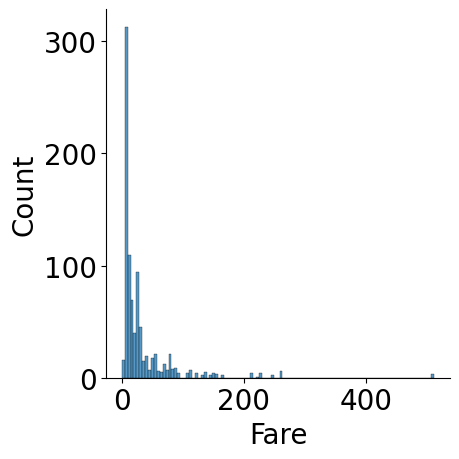

In [15]:
import seaborn as sns

sns.displot(df.Fare)

Ok, that is nice, but tiny... Le'ts make it larger:

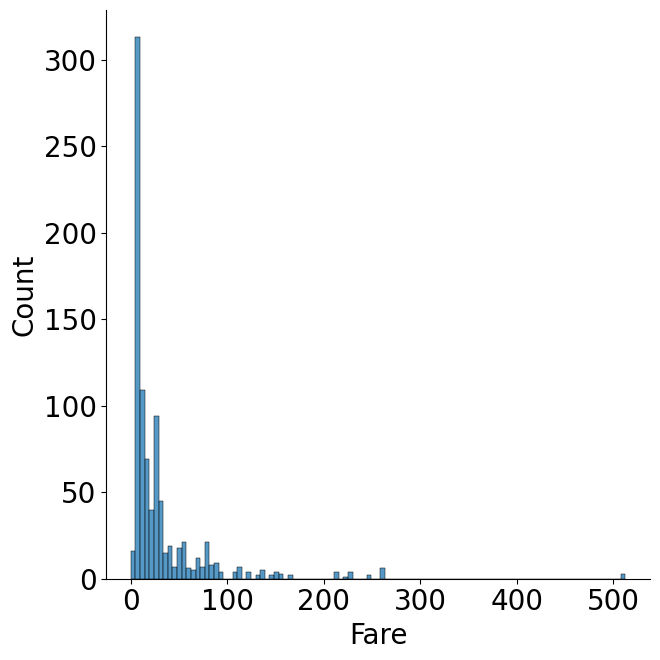

In [16]:
sns.displot(df.Fare, height=7)

Above, you should now see a histogram (in blue):
* The *x-axis* corresponds to the fare paid by each passenger.
* The *y-axis* corresponds to the **count**: the number of values falling in a given *bin*
  (i.e. a bar of the histogram).

By using the **`kind`** argument, one can change the type of plot:
* `kind="hist"`: histogram (this is the default).
* `kind="kde"`: density line (kernel density estimation).
* `kind="ecdf"`: cumulative distribution function.

<br>

**Example:**

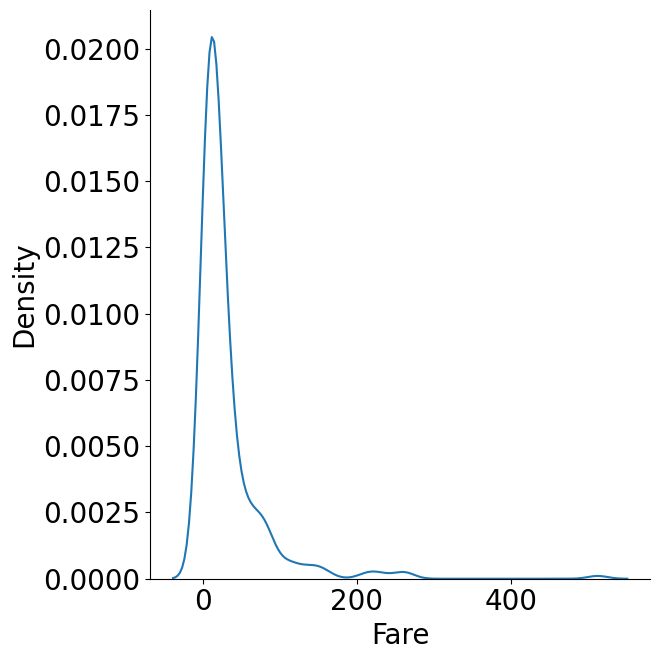

In [17]:
# Note: kde stands for 'kernel density estimation', which is the method used to compute the density line.
sns.displot(df.Fare, kind="kde", height=7)

> Note that the y-axis is now in **density** units.

Naturally, **`sns.displot()`** has many options allowing to combine plot types and pimp your plot.  
For instance, using `kde=True` will superimpose a density line:

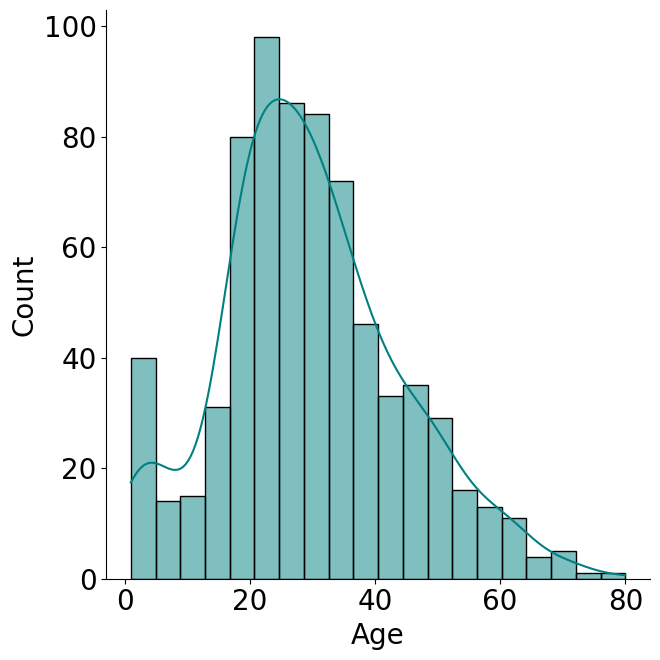

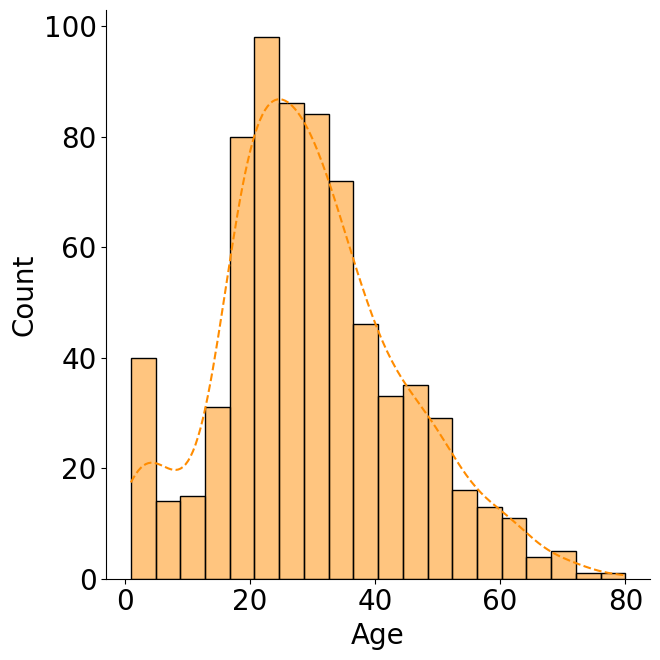

In [18]:
sns.displot(df.Age, kde=True, color="teal", height=7)

# Note: some attributes of the KDE line can be changed via the `line_kws` argument, but not its color.
sns.displot(df.Age, kde=True, color="darkorange", height=7, line_kws={"ls": "--"})

> *Note:* having both the histogram and the density line switches the y-axis from density to count,
  which is sometimes more interpretable.


`sns.displot()` is what we could call a **figure-level** function:
 * It has several *kind* of representation.
 * It does not play nice in **multi-panel** figures.

<br>
<br>


[Back to ToC](#toc)

### Interlude: multi-panel figures <a id='multi'></a>

**Multi-panel figures** can be created using `matplotlib` command and concepts.  
To make it simple, we call **`fig, axes = plt.subplots(nb_rows, nb_cols)`**, which creates:
 * **`fig`**: a `figure` object which controls the whole multi-panel figure
 * **`axes`**: a list containing individual `axe` objects though which we can plot on individual
   panels of the figure.
   
   > **What is a matplotlib `axe`?**  
   > Axes class represents one (sub-)plot in a figure. It contains the plotted data, axis ticks,
     labels, title, legend, etc. Its methods are the main interface for manipulating the plot
     in matplotlib. See [here](https://matplotlib.org/stable/api/axes_api.html) for details.


[<Axes: > <Axes: >]


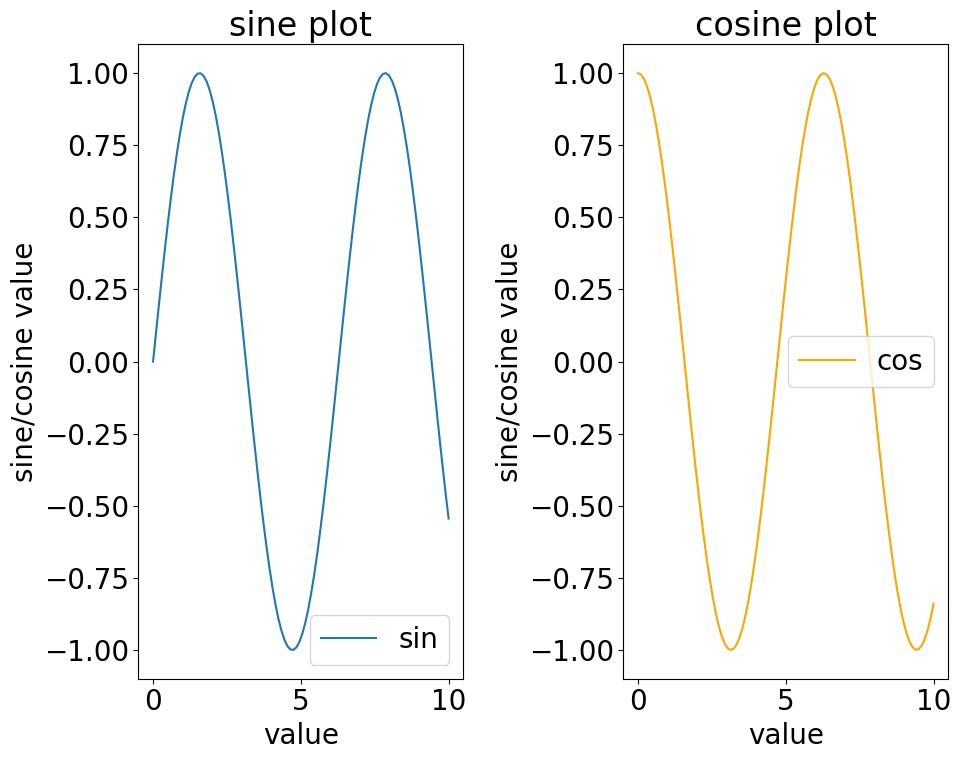

In [19]:
import numpy as np

# Create a list of 100 evenly spaced points between 0 and 10.
x = np.linspace(0, 10, 100) 

# Create a figure with multiple panels: 1 row, 2 columns.
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

print(axes)  # axes is a list of two axes objects.

# Plotting on the first axe => the left panel.
axes[0].plot(x, np.sin(x), label="sin")
axes[0].set_title("sine plot")
axes[0].set_xlabel("value")
axes[0].set_ylabel("sine/cosine value")
axes[0].legend()

# Plotting on the second axe => the right panel.
axes[1].plot(x, np.cos(x), label="cos", color="orange")
axes[1].set_title("cosine plot")
axes[1].set_xlabel("value")
axes[1].set_ylabel("sine/cosine value")
axes[1].legend()

plt.tight_layout()  # This creates a more harmonious organization of the different panels.
                    # E.g. it avoids that the labels of one plot overlap with the other plot.
plt.show()

<br>

### Back to data representation ...

The different values of the **`kind`** argument (`histogram`, `kde`, `ecdf`) of `sns.displot()` can all be called individually using their own functions:
* **`histplot()`**: histogram.
* **`kdeplot()`**: kernel density estimation line.
* **`ecdfplot()`**: cumulative distribution function.

In contrast to `sns.displot()` which is **figure-level**, these more-specialized functions are **axe-level**: they play nicely in a multiple panel context.  
They interface with `matplotlib`'s axes using the **`ax`** argument.

**Example:** plotting the passenger age and fare from the Titanic dataset.

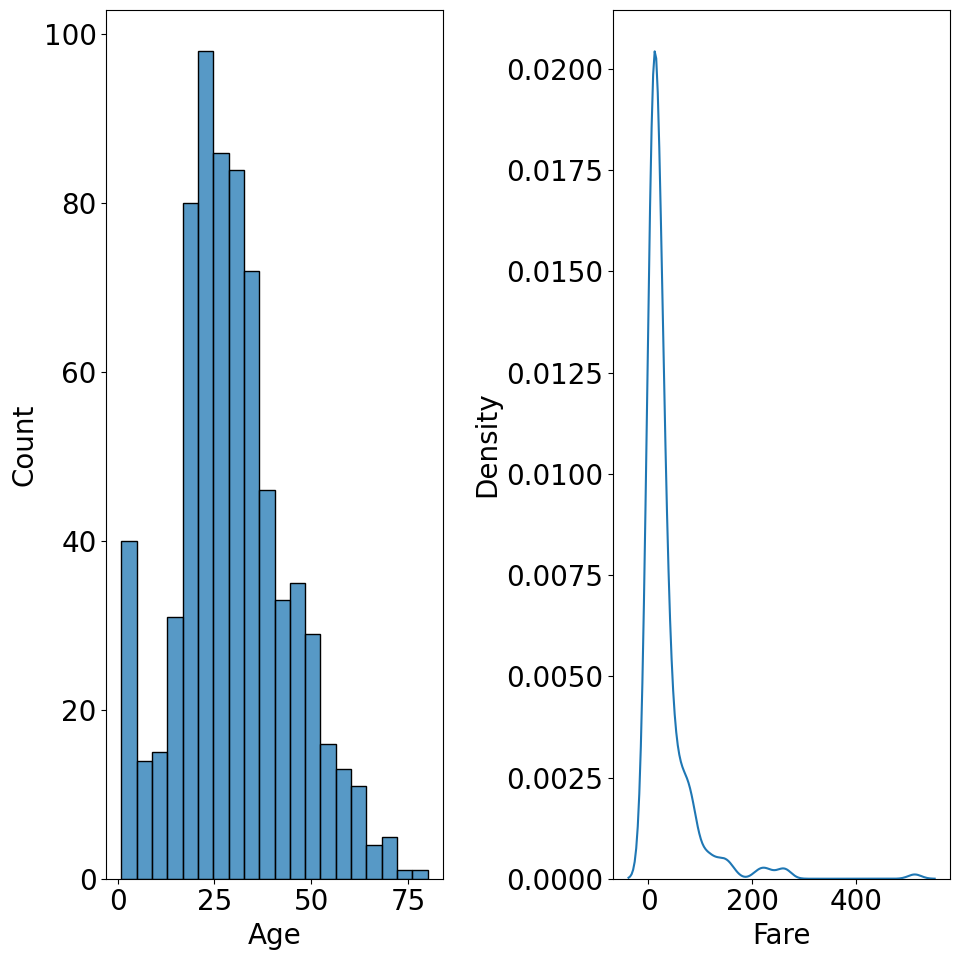

In [20]:
# Creating a figure with multiple panels: 1 row, 2 columns.
fig, axes = plt.subplots(1, 2)

# Plotting on the first axe == left panel.
sns.histplot(df.Age, ax=axes[0])

# Plotting on the second axe == right panel.
sns.kdeplot(df.Fare, ax=axes[1])

plt.tight_layout()
plt.show()

<br>

In **histogram**, a different number of *bins* shows different aspects of the distribution of your data and so it is important to choose one that is appropriate to your sample size and data.  
By default, seaborn automatically infers the number of *bins*. You may stick with the original or change it.

<br>

**Example:** plotting the same data with 4 different bin sizes.
Some notes about this example:
* In the example below, we are creating a figure with a 2 x 2 subplot organisation.
* `axes` is therefore a list of list of axes (a 2 x 2 matrix), to represent the 2-dimensional
  nature of our panels.
  ```
  [[<axe>,<axe>],
   [<axe>,<axe>]]
   ```
* We can specify where each plot goes on the figure with the ax argument.
  * `ax=axes[0,0]` is the top left corner.
  * `ax=axes[0,1]` is upper right.
  * `ax=axes[1,0]` is lower left.
  * etc...

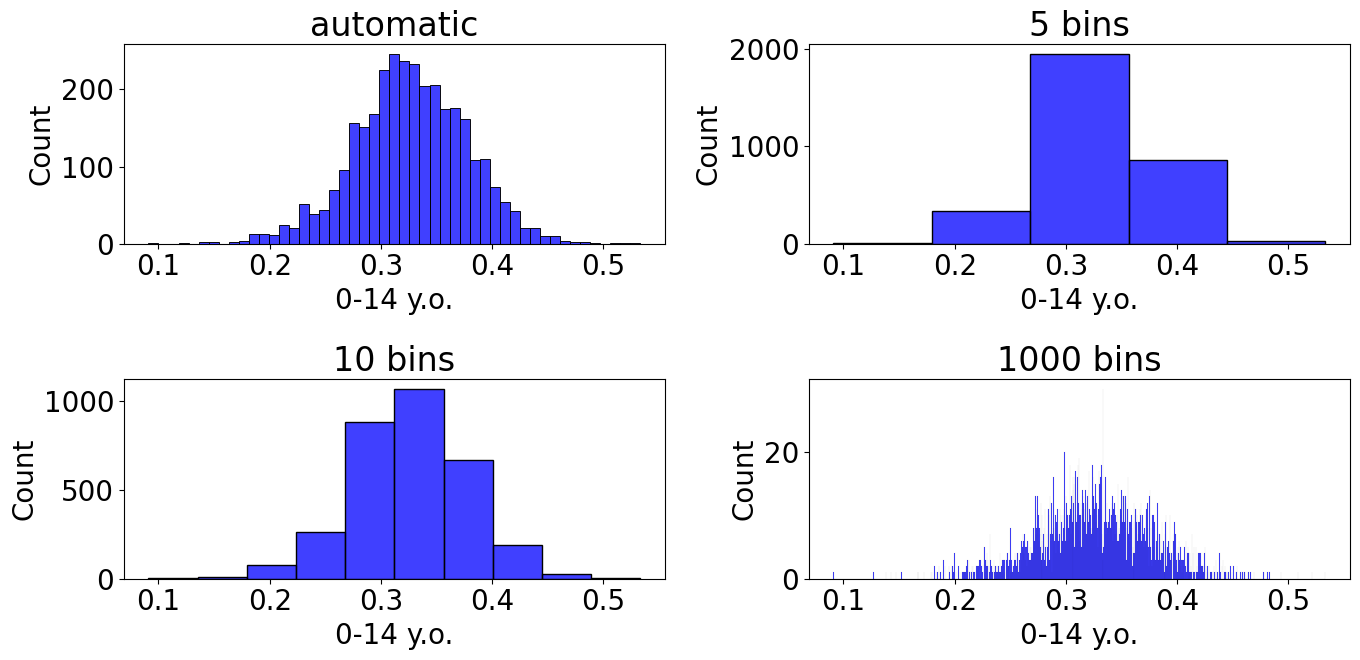

In [21]:
# Let's play with a different dataset for this example.
df_census = pd.read_table("data/census1880_fractions.csv", sep=",")

# Set up a figure with multiple panels, here a 2 by 2 grid.
f, axes = plt.subplots(2, 2, figsize=(14, 7))

# Plot a simple histogram with bin size determined automatically.
sns.histplot(
    df_census["0-14 y.o."],
    kde=False,
    color="b",
    ax=axes[0,0]
).set_title("automatic")

# Plot a simple histogram with a number of bins of 5, 10 and 1000.
sns.histplot(df_census["0-14 y.o."], bins=5    , kde=False, color="b", ax=axes[0,1]).set_title("5 bins")
sns.histplot(df_census["0-14 y.o."], bins=10   , kde=False, color="b", ax=axes[1,0]).set_title("10 bins")
sns.histplot(df_census["0-14 y.o."], bins=1000 , kde=False, color="b", ax=axes[1,1]).set_title("1000 bins")

plt.tight_layout()  # This makes the panels margins and setup more graceful.

<br>

To recap, **when to use `sns.histplot` or `sns.displot`**: 
 * `histplot`: gives a lower-level kind of plot which is easier to manipulate in multi-panel figures.
 * `displot`: high-level function, with a lot of capabilities, but does not play nice if it is not the top figure.
     


<br>

We can combine graphical elements coming from `matplotlib` and `seaborn` quite seamlessly.

Here is a more advanced example where we represent the the **mean**, the **median** and the **mode** of a distribution on top of an histogram.

In [22]:
# Define a small function that plots a distribution, along with its mean, median, and mode.

def plot_with_mean_median_mode(dat, ax):
    """Plots the specifie data `dat` onto the specified axe `ax`.
    Arguments:
     * dat: a pandas series.
     * ax : a matplotlib axe.
    """
    mode = dat.mode()[0]  # We only select the first mode.
    mean = dat.mean()
    median = dat.median()

    sns.histplot(dat, kde=True, ax=ax)  # Line for histogram and density line.
    
    # ".axvline()" adds a vertical line to the plot, at the specified location.
    ax.axvline(mean, color="r", linestyle="--", label="Mean")
    ax.axvline(median, color="g", linestyle="-", label="Median")
    ax.axvline(mode, color="b", linestyle="-", label="Mode")
    ax.legend(loc="upper right")


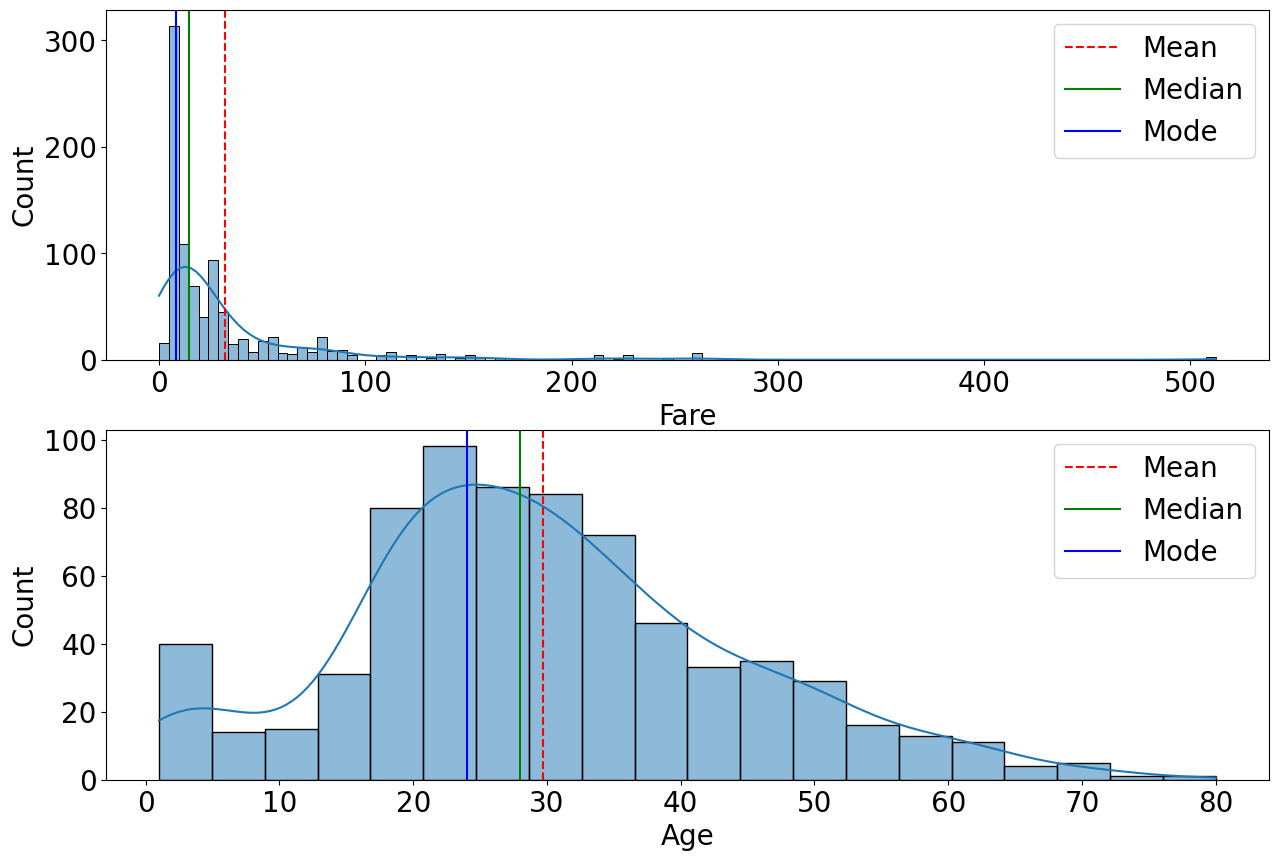

In [23]:
f, axes = plt.subplots(2, 1, figsize=(15, 10))

plot_with_mean_median_mode(df.Fare, axes[0])
plot_with_mean_median_mode(df.Age , axes[1])
plt.show()

Of note here :
 * `axvline`: create a vertical line.
 * `label`: legend label associated with the element created by this function.
   Common to a lot of matplotlib plotting functions.
 * `ax.legend()`: makes the legend appear.
 
> **Customizing the legend position with the `loc` argument**
> * The position of the legend can be manually set by passing the `loc` argument: `ax.legend(loc="upper right")`.
> * Possible values for `loc` are:
    * `"best"` (the default), `"upper left"`, `"upper right"`, `"lower left"`, `"lower right"`,
      `"upper center"`, `"lower center"`, `"center left"`, `"center right"`, `"center"`.
    * A `(x,y)` tuple, giving the coordiantes of the legend position.
    * More options to manually specify elements in the `help()`.


<br>
<br>

<div class="alert alert-block alert-success">

## Exercise 2.1 - histograms

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>



<br>
<br>

[Back to ToC](#toc)

## 3. Accounting for categories in the data <a id='descr.3'></a>


Here the categories would be the passenger's gender, but depending on data-sets they could be a genotype (Wild-Type versus KO), sex, experimental condition, ...

Of course, we could manually compute the means and plot an histogram for each category in our data-set, but pandas and seaborn offer much more efficient routines for doing this.


### 3.1 The `.groupby()` method <a id='descr.3.1'></a>

Computing a summary statistics on a pandas DataFrame is done **using the `df.groupby(...)` method and applying some function** to the result of that grouping.

**Example:** compute the median age per gender category. 

In [24]:
grouped = df.groupby("Sex")  # Grouping by gender.
grouped["Age"].median()      # Median age by gender.

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

<br>

Of course here there are only two categories, but this gets very interesting when there is a lot of categories.  
Remember our swiss census from 1880?

In [25]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")

grouped = df_census.groupby("canton name")
grouped["Catholic"].sum()                    # Number of catholics per canton in 1880.

canton name
Aargau                               88893
Appenzell Ausserrhoden                3694
Appenzell Innerrhoden                12294
Basel-Landschaft                     12109
Basel-Stadt                          19288
Bern / Berne                         65828
Fribourg / Freiburg                  97113
Genève                               51557
Glarus                                7065
Graubünden / Grigioni / Grischun     41711
Luzern                              129172
Neuchâtel                            11651
Nidwalden                            11901
Obwalden                             15078
Schaffhausen                          4154
Schwyz                               50266
Solothurn                            63037
St. Gallen                          126164
Thurgau                              27123
Ticino                              130017
Uri                                  23149
Valais / Wallis                      99316
Vaud                                 18170


A common task is also to get one list per group, for instance when we want to do statistical testing.

For this we combine the `groupby` with an `agg` (aggregation) to a `list`

In [28]:
df_census.groupby("canton name").Catholic.agg(list)

canton name
Aargau                              [1029, 9, 54, 3, 24, 7, 7, 36, 11, 20, 5, 46, ...
Appenzell Ausserrhoden              [1024, 128, 16, 43, 225, 106, 97, 123, 149, 21...
Appenzell Innerrhoden                            [4143, 1538, 1876, 1355, 1229, 2153]
Basel-Landschaft                    [1374, 1462, 716, 44, 15, 818, 710, 76, 768, 3...
Basel-Stadt                                                     [18556, 16, 281, 435]
Bern / Berne                        [42, 5, 2, 0, 0, 43, 0, 0, 0, 4, 6, 3, 8, 0, 0...
Fribourg / Freiburg                 [472, 144, 132, 234, 291, 181, 97, 163, 289, 3...
Genève                              [21375, 180, 94, 370, 363, 149, 462, 520, 309,...
Glarus                              [28, 56, 55, 16, 17, 274, 1327, 58, 38, 1, 294...
Graubünden / Grigioni / Grischun    [141, 128, 7, 193, 204, 785, 301, 334, 206, 26...
Luzern                              [626, 2902, 2951, 1470, 1468, 1468, 1409, 2837...
Neuchâtel                           [32, 3

In [33]:
## example of usage when doing an ANOVA on the number of catholics between cantons
from scipy import stats
aggregatedCatholics = df_census.groupby("canton name").Catholic.agg(list)

Fstat, pval = stats.f_oneway(*aggregatedCatholics)
# equivalent to stats.f_oneway( aggregated60fraction[0] , aggregated60fraction[1] , ... )

print("1-way anova / F-test:")
print("F-stat :",Fstat)
print("p-value:",pval)


## otherwise we would have to write:
# Fstat, pval = stats.f_oneway(df_census.Catholic[df_census.canton=='ZH'],
#                              df_census.Catholic[df_census.canton=='LS'],
#                              ...)


1-way anova / F-test:
F-stat : 37.442331572910824
p-value: 4.454782006583257e-152


For convenience, the groupby Serie can then be exported to a dictionary:

In [34]:
df_census.groupby("canton name").Catholic.agg(list).to_dict()

{'Aargau': [1029,
  9,
  54,
  3,
  24,
  7,
  7,
  36,
  11,
  20,
  5,
  46,
  14,
  2516,
  413,
  123,
  659,
  233,
  435,
  661,
  386,
  1241,
  152,
  542,
  493,
  723,
  506,
  674,
  505,
  669,
  1117,
  559,
  642,
  457,
  376,
  916,
  1614,
  341,
  1011,
  652,
  329,
  111,
  3,
  425,
  646,
  1355,
  267,
  699,
  234,
  427,
  1458,
  370,
  175,
  684,
  513,
  497,
  485,
  444,
  1295,
  704,
  342,
  430,
  1663,
  302,
  2534,
  616,
  414,
  160,
  238,
  5,
  8,
  12,
  13,
  133,
  18,
  0,
  2,
  3,
  18,
  8,
  6,
  1,
  5,
  3,
  0,
  8,
  1,
  4,
  12,
  3,
  1,
  2,
  6,
  30,
  2,
  12,
  10,
  8,
  7,
  17,
  2,
  414,
  8,
  1,
  22,
  14,
  16,
  6,
  7,
  9,
  7,
  3,
  113,
  0,
  80,
  1,
  4,
  11,
  22,
  13,
  5,
  834,
  234,
  895,
  808,
  943,
  723,
  688,
  254,
  1061,
  697,
  300,
  255,
  521,
  241,
  538,
  399,
  377,
  1042,
  301,
  627,
  891,
  708,
  637,
  1,
  3,
  2,
  11,
  0,
  28,
  0,
  12,
  4,
  5,
  352,
  9,
  19,

<br>

<div class="alert alert-block alert-success">
 
### Micro-Exercise 3
* Make a copy of the `df` data frame with `df.copy()`. Name it `dfc`, as shown here:
```python
dfc = df.copy()
```

* Add a new column named "Age_category" to `dfc`. Make use of the `age_category` function defined below
  to classify passengers into their respective age classes.
```python
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label
```

* Compute survival rates by gender, age category and passenger class.

<br>
    
**Additional task (if you have time)**: create a DataFrame that contains both the survival rates and the
counts (i.e. number of people) per category.
* **Additional task hint:** you can create a DataFrame from multiple series with
  `pd.DataFrame([Series1, Series2, ...])`
* **Additional task hint:** you can transpose a DataFrame with the `.transpose()` method.

<div>

In [69]:
dfc = df.copy()
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label


<br>

[Back to ToC](#toc)

### 3.2 The `hue` argument and `sns.catplot()` <a id='descr.3.2'></a>

Computing these summary statistics is all good, but you can also visualize them using the **`seaborn`** argument **`hue`**:
* **`hue`** is quite ubiquitous in seaborn functions, and lets you determine a **categorical column** by
  which you want to split your representation.
* Note how we switched our syntax too: we now use **column names**, and use the **`data=`** argument to
  specify from which `DataFrame` the data comes.


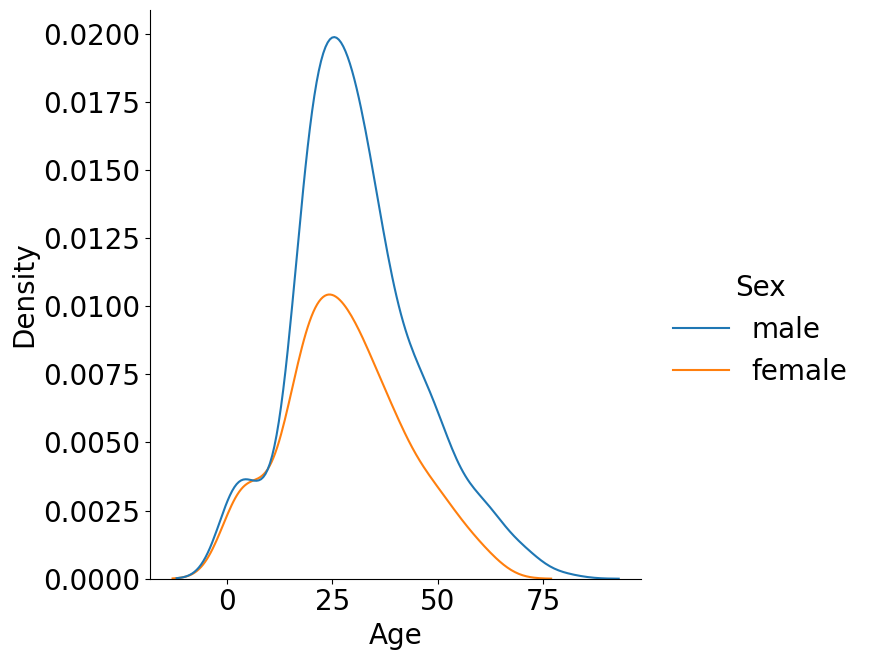

In [70]:
sns.displot(x="Age", hue="Sex", data=df, kind="kde", height=7)

<br>

The default seaborn scheme is fairly nice, but maybe you want to change it:
> Note: use the argument **`linewidth=`** to get wider/narrower lines.


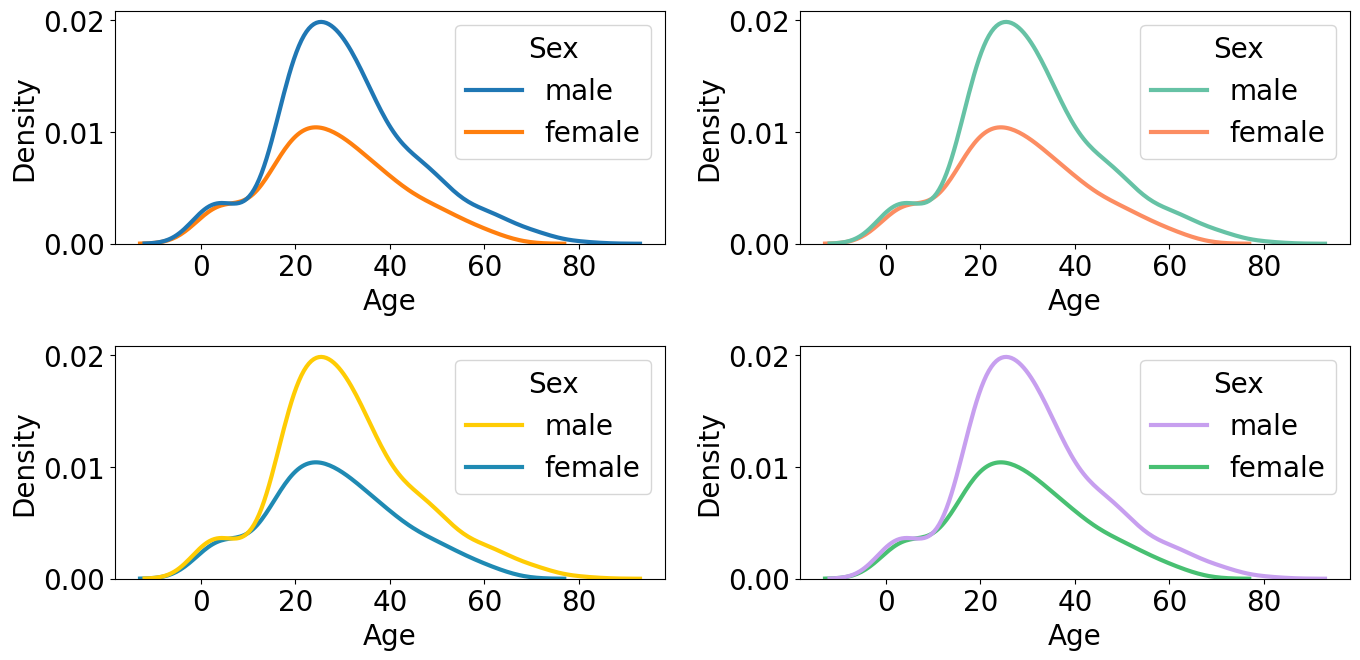

In [71]:
f, axes = plt.subplots(2, 2, figsize=(14, 7))

# Default
sns.kdeplot(x="Age", hue="Sex", linewidth=3, data=df , ax=axes[0][0])

# Using an existing seaborn palette
sns.set_palette(sns.color_palette("Set2"))
sns.kdeplot(x="Age", hue="Sex", data=df, linewidth=3, ax=axes[0][1])


# Setting manually, with hex values
sns.kdeplot(
    x="Age", hue="Sex", data=df,
    linewidth=3, ax=axes[1][0], 
    palette = ["#FFCC04","#1F8AB3"]
)

# Setting semi-manually, using the xkcd palette https://xkcd.com/color/rgb
sns.kdeplot(
    x="Age", hue="Sex", data=df,
    linewidth=3, ax=axes[1][1], 
    palette=["xkcd:lavender", "xkcd:dark mint"]
)

plt.tight_layout()

You can learn more on all the options there :
 * [matplotlib colors](https://matplotlib.org/stable/tutorials/colors/colors.html)
 * [seaborn colors](https://seaborn.pydata.org/tutorial/color_palettes.html)
 

<br>

Sometimes, the `displot` options don't really cut it, perhaps because you have many different categories, or maybe because you want to have more than one column to do the categorization.

This is when **`sns.catplot()`**, another **figure-level** function with a lot a `kind`, saves the day!


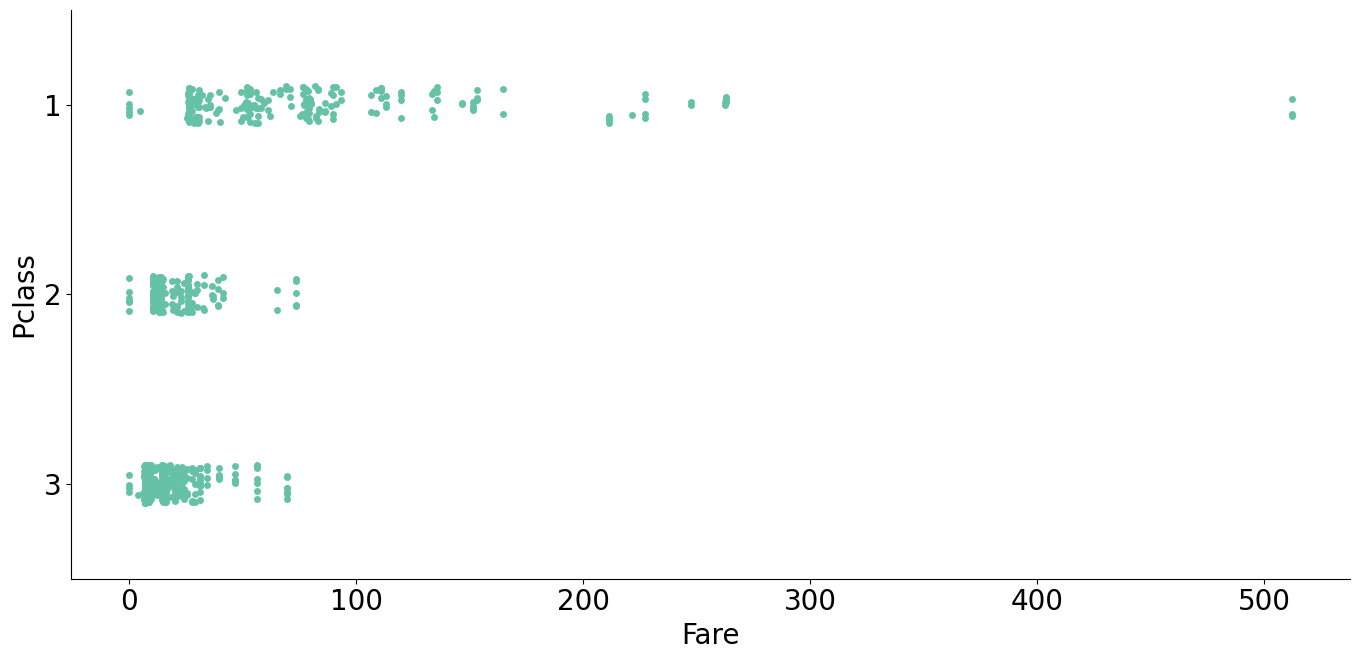

In [72]:
sns.catplot(
    x="Fare", y="Pclass",
    orient="horizontal",
    data=df,
    aspect=2.0, height=7
)

Like `sns.displot`, `sns.catplot` is a master function which is designed to create a full figure at once rather than be embedded in a larger figure. 

This is why its arguments are a bit different when it comes to setting the figure *height and width*, which is done using :
 * `height` : height of the figure (no trick there)
 * `aspect` : width/height ratio of the figure ( high aspect -> wider figure )

The **`kind`** argument let's you control the overall look of the plot. I
It can be:
* 'strip' : this is the default, showing all data points. 
* **'box'** : the famous boxplot.
* **'violin'** : an alternative to the boxplot using density lines.
* **'bar'** : the (in)famous barplot.
* 'swarm' : similar to 'strip' but with another way of arranging the points.
* 'boxen' : some intermediary between a boxplot and a violin plot.
* 'point' : alternative to the barplot where only the top point is shown.


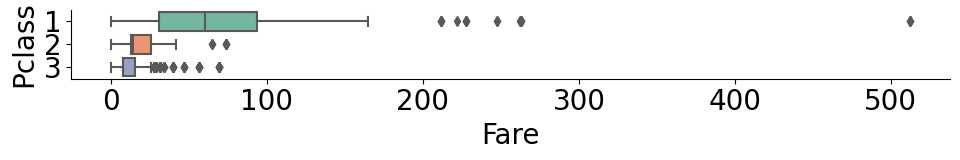

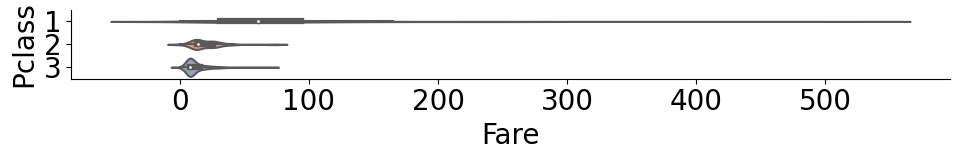

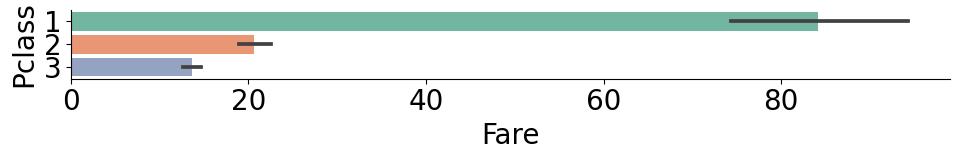

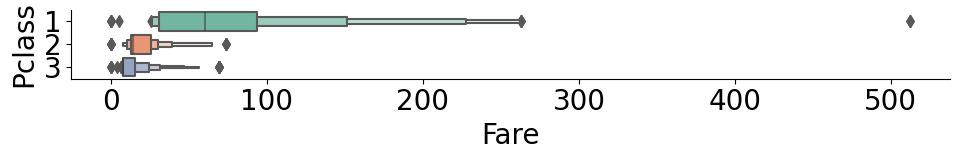

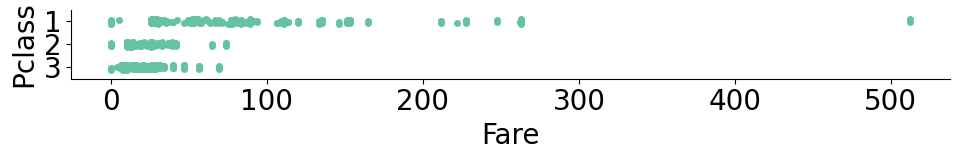

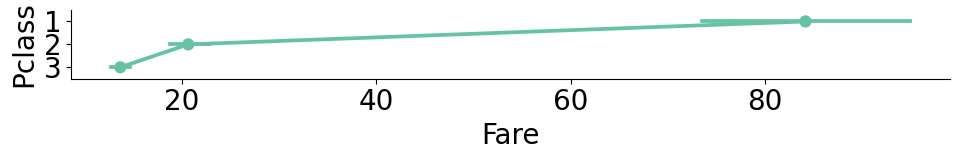

In [73]:
kinds = ["box", "violin", "bar", "boxen", "strip", "point"]  #,"swarm"] # swarm takes a long time to compute

for i, k in enumerate(kinds):
    sns.catplot(x="Fare", y="Pclass", orient="horizontal", data=df, kind=k, aspect=5, height=2)


So here we can see:
 * **boxplot:** represent quartiles and a few other things.
 * **violinplot:** density line plot with an (optional) boxplot in the center.
 * **barplot:** just shows the mean + an error bar (by default 95% CI computed using bootstrapping).
 * **boxen:** the unholy child of a boxplot and a violinplot.
 * **strip:** the default, shows the points (super nice, except when you have a lot of points).
 * **point:** basically a barplot without bars and a line between categories.

Given all this, one can reasonably ask the question : **which one is the *best* ?**

While the answer is not clear about the best way to represent a distribution over one or multiple categories, we definitely have some [good answers regarding bad/misleading ways](https://stekhoven.shinyapps.io/barplotNonsense/) (hint, barplot does not shine).  

<br>

With `sns.catplot()`, the **`hue`** argument can also be used here to great effect:

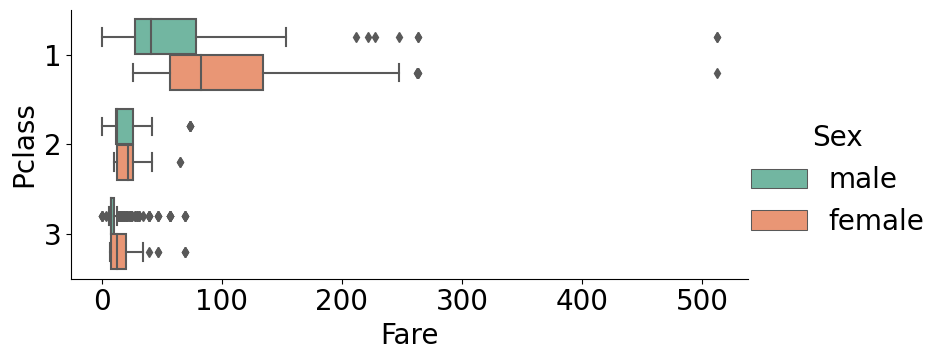

In [74]:
sns.catplot(
    x="Fare", y="Pclass",
    hue="Sex",
    orient="horizontal",
    kind="box",
    data=df,
    aspect=2.0, height=4
)
# It is also very nice with kind="point".

<br>
<br>

<div class="alert alert-block alert-success">

## Exercise 2.2 - Representing categories

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>



<br>
<br>

[Back to ToC](#toc)

## 4. Representing the relationship between 2 numerical variables <a id="plot2" ></a>


**`sns.scatterplot()`** lets us represent the relationship between two numerical variables.

In [75]:
df = pd.read_table("data/titanic.csv", sep=",")  # Just in case we need to re-read the data.

In [76]:
# Reset the seaborn default theme.
sns.reset_orig()

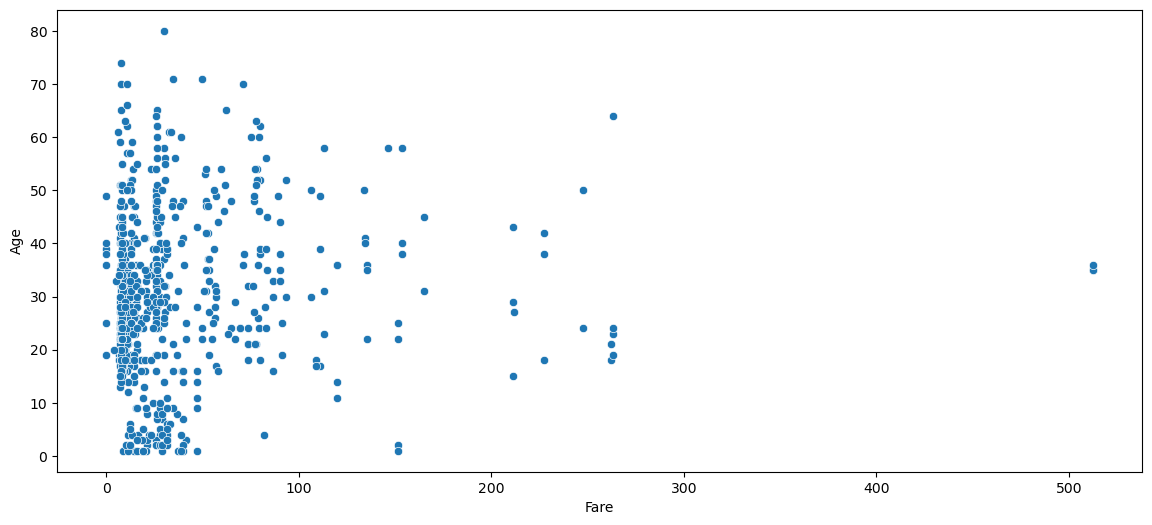

In [77]:
fig = plt.figure(figsize=(14, 6))
ax = sns.scatterplot(x="Fare", y="Age", data=df)
plt.show()

<br>

OK, it is not so nice... let's set the x-axis to a log scale:

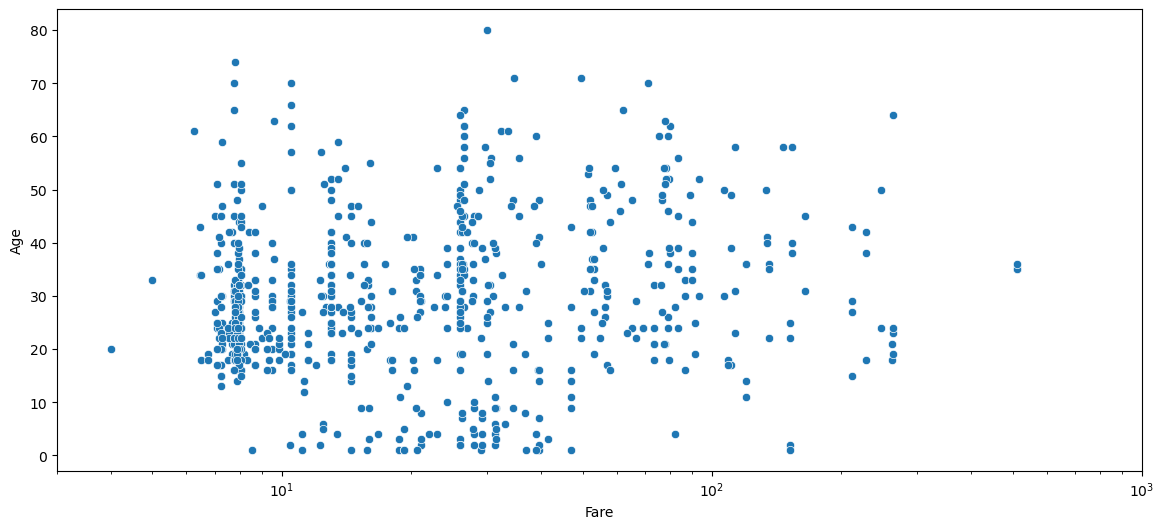

In [78]:
fig = plt.figure(figsize=(14, 6))
ax = sns.scatterplot(x="Fare", y="Age", data=df)
ax.set(xscale="log")      # Setting axis to log scale.
ax.set_xlim((3, 1000))    # Manually setting the limit of the x axis.
plt.show()

Of course, we can customize:
> Note the argument **`style=`** used to associate a marker shape to a column.

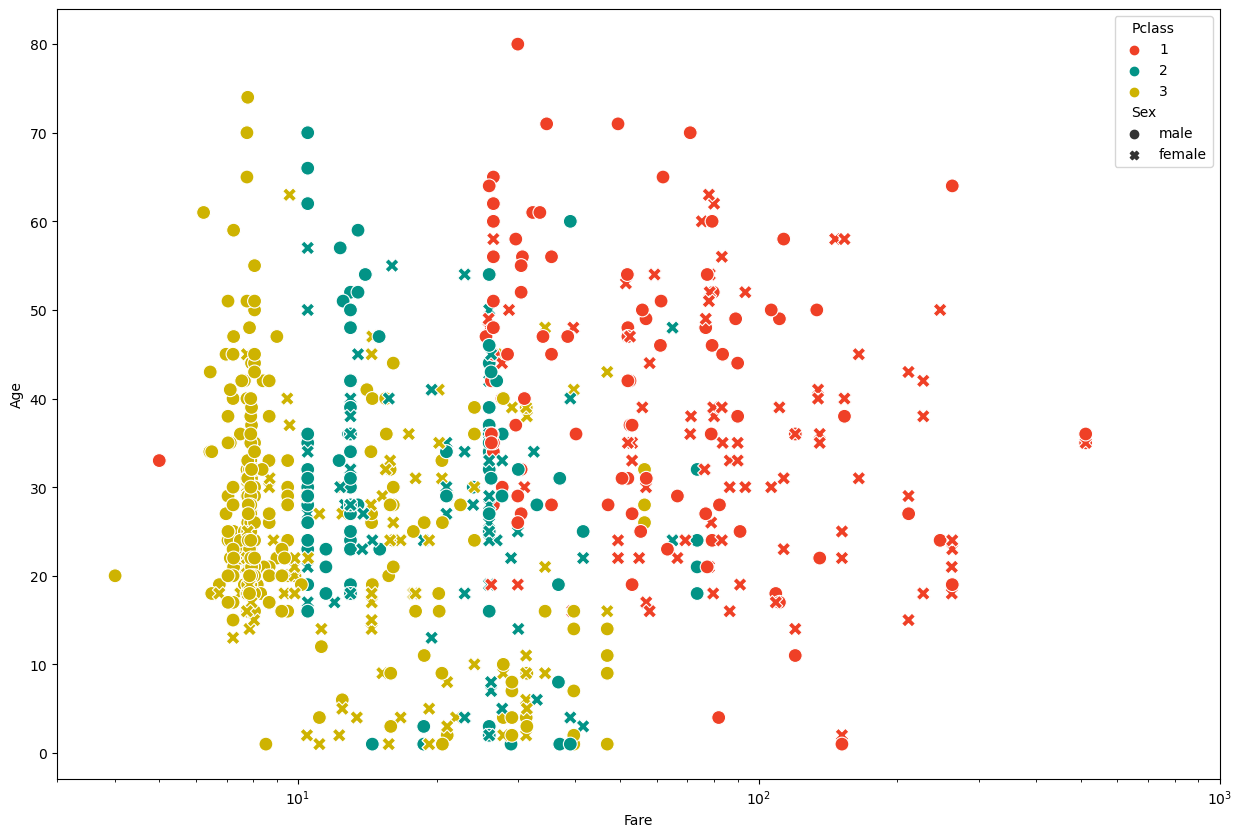

In [79]:
fig = plt.figure(figsize=(15, 10))
ax = sns.scatterplot(
    x="Fare", y="Age", 
    hue="Pclass",
    palette=["xkcd:tomato", "xkcd:teal", "xkcd:mustard"],
    style="Sex",
    data=df,
    s=100
)
ax.set(xscale="log")    # Setting axis to log scale.
ax.set_xlim((3, 1000))  # Manually setting the limit of the x axis.
plt.show()

<br>

An alternative with more colors and a single marker.
This was adapted from [this stackoverflow question](https://stackoverflow.com/questions/62230507/multiple-columns-for-hue-parameter-in-seaborn-violinplot).


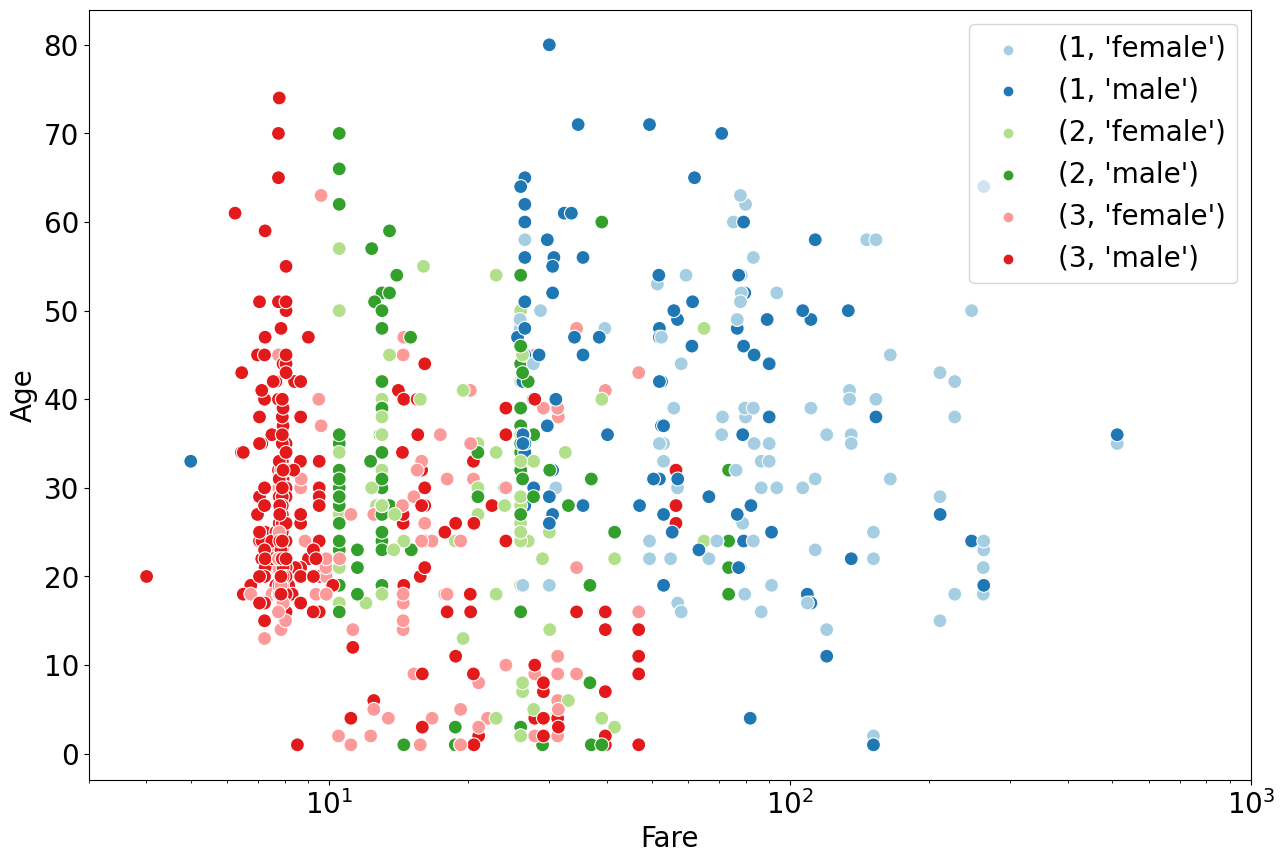

In [45]:
fig = plt.figure(figsize=(15, 10))

# We combine the 2 columns to later apply them as categories.
CAT = df[["Pclass", "Sex"]].apply(tuple, axis=1)

ax = sns.scatterplot(
    x="Fare", y="Age", 
    hue=CAT,
    hue_order=sorted(CAT.unique()),           # Handle the order categories in legend.
    palette=sns.color_palette("Paired")[:6] , # Here the paired palette is great.
    data=df, s=100
)
ax.set(xscale="log")     # Setting axis to log scale.
ax.set_xlim((3, 1000))   # Manually setting the limit of the x axis.
plt.show()

Sometimes a 2D density plot may give you a higher level view of your data:

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

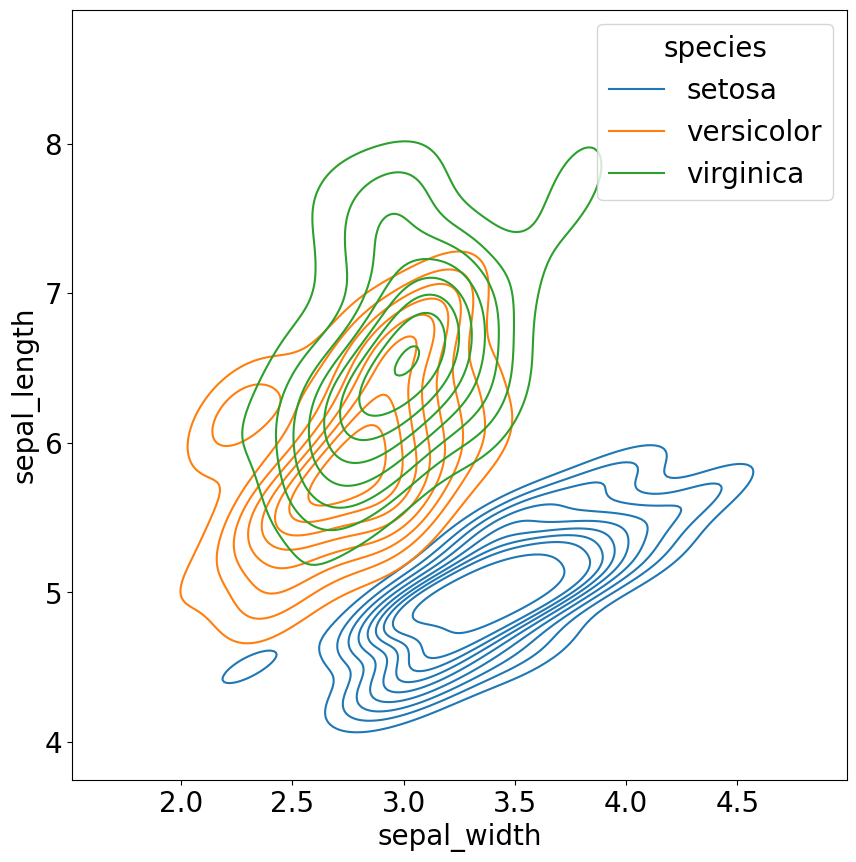

In [59]:
iris = sns.load_dataset("iris")
# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris,
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

In other cases you may prefer to represent lines:

<Axes: xlabel='timepoint', ylabel='signal'>

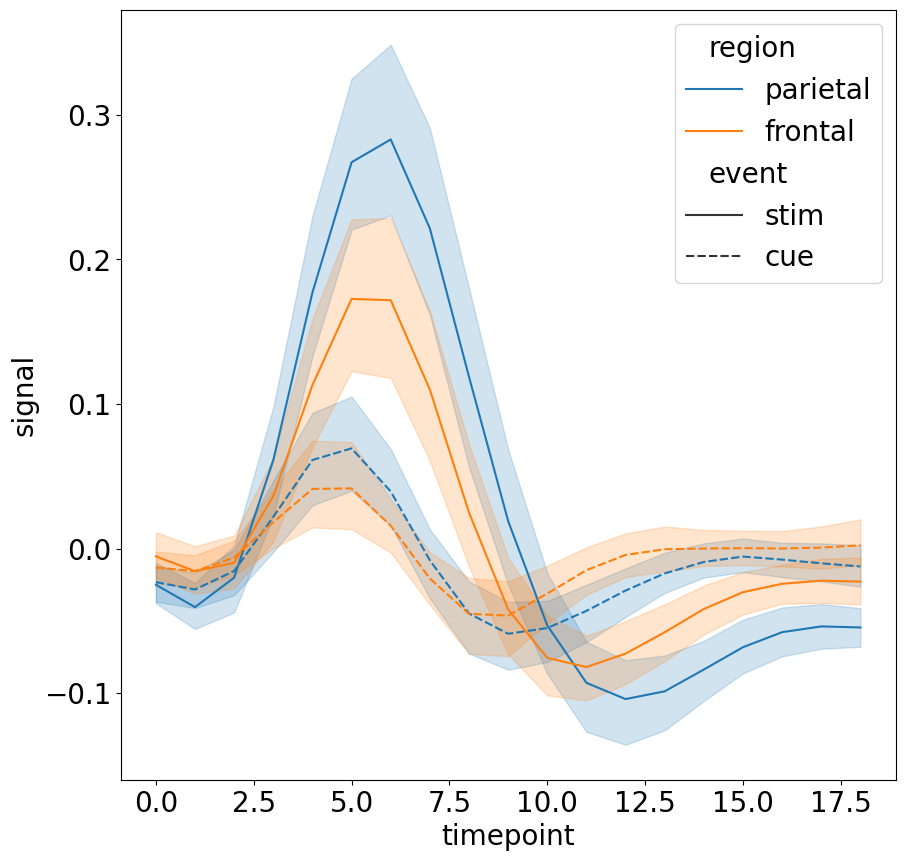

In [43]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
#   with 95% confidence interval, 
#    other options include ("ci", "pi", "se", or "sd") or something custom
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             errorbar = ('ci',95) , 
             data=fmri)

Finally, a little data exploration trick : **`sns.pairplot()`**

In [81]:
sns.pairplot(df_census.iloc[:, 3:10])

<br>
<br>
<br>

[Back to ToC](#toc)


## 5. Writing plots to disk <a id='writing'></a>
------------------------------------

To save figures to disk, we rely on the **`savefig()`** method:
* Different output formats can be specified by changing the output file name extension, 
  e.g. `.pdf`, `.svg`, `.jpg`, ...
* For raster formats, the `dpi` argument can be used to define the image quality.
* See `help(plt.savefig)` or [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig#matplotlib.pyplot.savefig) for more info.

In [82]:
k = "box"

# Make you plot as usual, redirecting it to a variable (my_plot).
represented_variable, category = "Total", "majority language"
my_plot = sns.catplot(
    x=represented_variable,
    y=category,
    data=dfFractions,
    kind=k, orient="h",
    height=10, aspect=2
)

# Save plot to disk, using the savefig() method:
my_plot.savefig("output.png")

In [83]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

In [84]:
# For multi-panel figures:
f, axes = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(dfFractions["0-14 y.o."], kde=False, color="b", ax=axes[0, 0]).set_title("automatic")
sns.histplot(dfFractions["0-14 y.o."], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title("5 bins")
sns.histplot(dfFractions["0-14 y.o."], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title("10 bins")
sns.histplot(dfFractions["0-14 y.o."], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title("1000 bins")
plt.tight_layout()  # This makes the panels margins and setup more graceful.

f.savefig("output_multipanel.pdf")

<br>
<br>
<br>

[Back to ToC](#toc)

<div class="alert alert-block alert-success">

## Exercise 2.3 - Free form exercise

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>


<br>
<br>
<br>

# Additional Material
------------------------------

## Annex 1 - seaborn themes + python graph gallery <a id="gallery"></a>

Seaborn and matplotlib offer nigh-endless possibilities when it comes to customizing graph elements.
* A simple way to change the general feeling of a figure is to play with
  [seaborn themes](https://seaborn.pydata.org/tutorial/aesthetics.html), or
  [matplotlib styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles).

* In general, when composing a figure we often start from an existing examples.
  Here are useful resources to do just that:
  * [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)
  * [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
  * [python-graph-gallery](https://www.python-graph-gallery.com/)